In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# Read csv files
df = pd.read_csv('AP_SAT_Data.csv')
testing_df = pd.read_csv('testing.csv')

In [3]:
# Return the first 5 rows
df.head()

,DBN,SchoolName,No_AP_TestTakers,Total_Exam_Taken,No_Exam_Passed,SAT_Math_Score
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10,419
1,01M515,LOWER EASTSIDE PREP,24,26,24,532
2,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191,583
3,02M300,"Urban Assembly School of Design and Construction,",99,117,10,446
4,02M305,"Urban Assembly Academy of Government and Law, The",25,37,15,406


In [4]:
# Display column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DBN               148 non-null    object
 1   SchoolName        148 non-null    object
 2   No_AP_TestTakers  148 non-null    object
 3   Total_Exam_Taken  148 non-null    object
 4   No_Exam_Passed    148 non-null    object
 5   SAT_Math_Score    148 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 7.1+ KB


In [9]:
# Check for commas
df[(df['No_AP_TestTakers'].str.contains(',')) | (df['Total_Exam_Taken'].str.contains(','))
| (df['No_Exam_Passed'].str.contains(','))]

,DBN,SchoolName,No_AP_TestTakers,Total_Exam_Taken,No_Exam_Passed,SAT_Math_Score
16,02M475,STUYVESANT HS,"1,510","2,819","2,648",735
33,03M485,FIORELLO H.LAGUARDIA HS,691,"1,236",790,555
71,10X445,BRONX HS OF SCIENCE,"1,190","2,435","2,189",685
80,13K430,BROOKLYN TECHNICAL HS,"2,117","3,692","2,687",652
102,22K405,MIDWOOD HS,745,"1,223",758,543
117,26Q415,BENJAMIN N. CARDOZO,676,"1,145",796,551
118,26Q430,FRANCIS LEWIS HS,697,"1,033",583,530
125,28Q440,FOREST HILLS HS,733,"1,116",526,491


In [11]:
# Remove commas so sklearn reads values as numbers
df['No_AP_TestTakers'] = df['No_AP_TestTakers'].str.replace(',', '') 
df['Total_Exam_Taken'] = df['Total_Exam_Taken'].str.replace(',', '') 
df['No_Exam_Passed'] = df['No_Exam_Passed'].str.replace(',', '')

In [13]:
# Return the first 5 rows
testing_df.head()

,DBN,SCHOOL NAME,No_AP_TestTakers,Total_Exam_Taken,No_Exam_Passed,SAT_Math_Score
0,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21,423
1,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,50,60,54,557
2,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",306,587,323,574
3,02M300,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,135,135,8,449
4,02M305,"URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE",31,40,20,388


In [15]:
# Display column data types and non-null counts
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DBN               174 non-null    object
 1   SCHOOL NAME       174 non-null    object
 2   No_AP_TestTakers  174 non-null    int64 
 3   Total_Exam_Taken  174 non-null    int64 
 4   No_Exam_Passed    174 non-null    int64 
 5   SAT_Math_Score    174 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ KB


In [17]:
# Initialize testing data
y_test = testing_df['SAT_Math_Score']

## **Model 1**
##### Independent variables: No_AP_TestTakers and Total_Exam_Taken 
##### Dependent / target variable: SAT_Math_Score

In [22]:
x1 = df[['No_AP_TestTakers', 'Total_Exam_Taken']]
y = df['SAT_Math_Score']

In [28]:
# Create and fit the linear regression model to the data
lm1 = LinearRegression().fit(x1,y)

lm1

LinearRegression()

### Regression Equation
> y = b₀ + b₁X₁ + b₂X₂ + ... + bₚXₚ

In [31]:
intercept1 = lm1.intercept_
coef1 = lm1.coef_
print(f"y = {intercept1:.2f} + {coef1[0]:.2f}X1 + {coef1[1]:.2f}X2")

y = 421.46 + 0.24X1 + -0.03X2


In [33]:
# Predict the target variable SAT_Math_Score
y_predict1 = lm1.predict(x1)

## **Model 2**
##### Independent variables: No_AP_TestTakers, Total_Exam_Taken, and No_Exam_Passed
##### Dependent / target variable: SAT_Math_Score

In [36]:
x2 = df[['No_AP_TestTakers', 'Total_Exam_Taken', 'No_Exam_Passed']]

In [38]:
# Create and fit the linear regression model to the data
lm2 = LinearRegression().fit(x2,y)

lm2

LinearRegression()

### Regression Equation
> y = b₀ + b₁X₁ + b₂X₂ + ... + bₚXₚ

In [41]:
intercept2 = lm2.intercept_
coef2 = lm2.coef_
print(f"y = {intercept2:.2f} + {coef2[0]:.2f}X1 + {coef2[1]:.2f}X2 + {coef2[2]:.2f}X3")

y = 429.41 + 0.55X1 + -0.41X2 + 0.26X3


In [43]:
# Predict the target variable SAT_Math_Score
y_predict2 = lm2.predict(x2) 

## **Evaluation of the Models' Performance:** Training Data

> ### Model 1

In [47]:
training_mse1 = mean_squared_error(y, y_predict1)

training_mse1

3565.6112371183126

> ### Model 2

In [50]:
training_mse2 = mean_squared_error(y, y_predict2)

training_mse2

3128.046958490197

### Conclusion
#### Model 2 has a slightly lower MSE of 3128.05 compared to Model 1's MSE of 3565.61, indicating that Model 2 provides more accurate predictions of SAT Math scores.

## **Evaluation of the Models' Performance:** Testing Data

> ### Model 1

In [55]:
testing_mse1 = mean_squared_error(y_test[:148], y_predict1)

testing_mse1

6964.886847632299

> ### Model 2

In [58]:
testing_mse2 = mean_squared_error(y_test[:148], y_predict2)

testing_mse2

7829.905993110679

### Conclusion
#### Model 1 has lower MSE of 6964.89 compared to Model 2's MSE of 7829.91, indicating that Model 1 provides more accurate predictions of SAT Math scores. Model 2’s lower training MSE likely comes from its higher complexity, causing it to overfit--capturing noise in the training data--whereas Model 1, with less independent variables, generalizes better to new data.

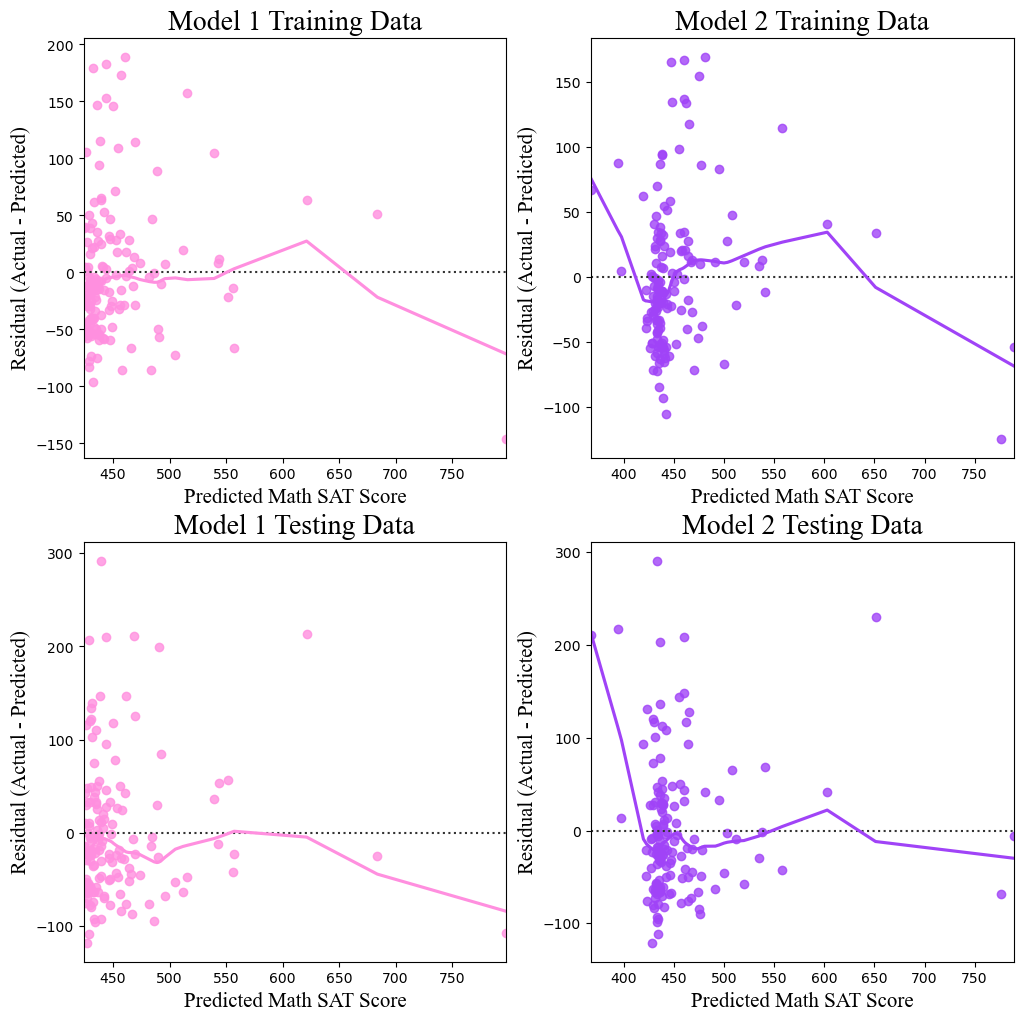

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Model 1 Training Data
plt.subplot(2, 2, 1)
sns.set_style({'grid.color': 'grey'})
sns.residplot(x = y_predict1, y = y, lowess = True, color = '#ff8fdf', )
plt.title('Model 1 Training Data', font = 'Times New Roman', size = 20)
plt.xlabel('Predicted Math SAT Score', font = 'Times New Roman', size = 15)
plt.ylabel('Residual (Actual - Predicted)', font = 'Times New Roman', size = 15)

# Model 2 Training Data
plt.subplot(2, 2, 2)
sns.set_style({'grid.color': 'grey'})
sns.residplot(x = y_predict2, y = y, lowess = True, color = '#a043f7')
plt.title('Model 2 Training Data', font = 'Times New Roman', size = 20)
plt.xlabel('Predicted Math SAT Score', font = 'Times New Roman', size = 15)
plt.ylabel('Residual (Actual - Predicted)', font = 'Times New Roman', size = 15);

# Model 1 Testing  Data 
plt.subplot(2, 2, 3)
sns.set_style({'grid.color': 'grey'})
sns.residplot(x = y_predict1, y = y_test[:148], lowess = True, color = '#ff8fdf', )
plt.title('Model 1 Testing Data', font = 'Times New Roman', size = 20)
plt.xlabel('Predicted Math SAT Score', font = 'Times New Roman', size = 15)
plt.ylabel('Residual (Actual - Predicted)', font = 'Times New Roman', size = 15)

# Model 2 Testing Data
plt.subplot(2, 2, 4)
sns.set_style({'grid.color': 'grey'})
sns.residplot(x = y_predict2, y = y_test[:148], lowess = True, color = '#a043f7')
plt.title('Model 2 Testing Data', font = 'Times New Roman', size = 20)
plt.xlabel('Predicted Math SAT Score', font = 'Times New Roman', size = 15)
plt.ylabel('Residual (Actual - Predicted)', font = 'Times New Roman', size = 15);

plt.show()